In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tueplots import bundles
from tueplots.constants.color import rgb

In [19]:
gain_dict = {}
main_folder_path = '../dat/convergence'
for foldername in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, foldername)

    folder_dict = {}
    print(foldername)

    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            
            key_city = filename.split('_')[1].replace(".json", "")
            key_city = key_city.replace('ä', 'ae').replace('ö', 'oe').replace('ü', 'ue')

            df = pd.read_json(file_path, orient='index')
            df.index = df.index.str.replace('ä', 'ae').str.replace('ö', 'oe').str.replace('ü', 'ue')
            #print(key_city)
            folder_dict[key_city] = df
    
    gain_dict[foldername] = folder_dict
    

#print(dict_avg_gain['Berlin Hbf'])

no_wait
theoretical_max_gain


In [20]:
dict_mean_delays = {}


# data processing

# iterate over different gain assumptions
for key_gain, df_dict in gain_dict.items():


    switch_times_array = list(range(1,121,1))
    empty = pd.DataFrame(columns=['switch_times', 'date' ,'mean_delay', 'reachable1', 'reachable2', 'reachable3'])
    empty.switch_times = switch_times_array
    empty['mean_delay'] = [[] for _ in range(120)]
    empty.loc[:, ['reachable1', 'reachable2', 'reachable3']] = 0

    #for column in ['mean_delay', 'reachable1', 'reachable2', 'reachable3']: # fill cells with empty lists such that later can fill with numbers
    #    empty[column] = [np.array([]) for _ in range(60)]
    #display(empty.head(2))

    # -------------------

    delay_matrix = [[] for _ in range(120)]

    # iterate all dfs in gain assumption
    for key, df in df_dict.items():
        
        #display(df.head(2))
        for irow, row in df.iterrows():
            
            #print(row)

            for i, minute in enumerate(row['switch time']):
                #print(minute)
                if minute > 120:
                    continue
                
        
                delay = row['delay'][i]
                #print(empty.loc[minute-1, 'mean_delay'])
                #print(type(empty.loc[minute-1, 'mean_delay']))


                #empty.loc[minute-1, 'mean_delay'].append(delay)
                delay_matrix[int(minute-1)].append(delay)

                #print(empty.loc[minute-1, 'mean_delay'])
                

                # Fill the reachable columns
                case = row['reachable'][i]
                if case == 1:
                    empty.loc[minute-1, 'reachable1'] += 1
                elif case == 2:
                    empty.loc[minute-1, 'reachable2'] += 1
                elif case == 3:
                    empty.loc[minute-1, 'reachable3'] += 1
                
                #display(empty)
                #break
    
            #break

    means = []
    #medians = []
    for minute in delay_matrix:
        means.append(np.mean(minute).round(2))
        #medians.append(np.median(minute).round(2))

    #print(means)
    empty['mean_delay'] = means
    #empty['median_delay'] = medians
    df_mean_delays = empty

    dict_mean_delays[key_gain] = df_mean_delays


c:\Users\jb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [21]:
worst_case = np.array(dict_mean_delays['no_wait']["mean_delay"])
best_case = np.array(dict_mean_delays['theoretical_max_gain']["mean_delay"])

In [22]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#worst_case = [72.17, 52.4, 50.42, 60.03, 44.74, 42.37, 35.19, 39.44, 31.97, 34.97, 37.49, 40.69, 28.18, 23.55, 29.64, 24.8, 28.93, 26.62, 29.12, 29.21, 27.21, 23.67, 22.58, 25.78, 28.66, 23.06, 25.55, 17.5, 28.01, 20.47, 18.93, 15.85, 24.3, 21.19, 21.03, 19.58, 22.2, 20.57, 16.45, 18.19, 19.02, 20.05, 20.23, 14.21, 20.4, 17.18, 14.8, 15.72, 17.17, 16.5, 17.12, 14.96, 19.69, 17.93, 20.9, 14.57, 20.47, 13.22, 14.55, 15.0, 14.57, 20.47, 13.22, 14.55, 15.0, 14.57, 20.47, 13.22, 14.55, 15.0]
#best_case = [36.0, 28.91, 31.82, 34.76, 30.41, 34.54, 28.32, 25.01, 22.53, 23.65, 22.87, 33.42, 21.78, 17.44, 17.98, 19.34, 22.59, 21.04, 22.15, 21.36, 19.96, 19.17, 17.91, 22.7, 23.59, 18.9, 21.24, 14.98, 24.68, 18.53, 14.89, 14.11, 21.47, 19.68, 17.94, 17.72, 19.49, 19.65, 14.52, 16.22, 16.02, 18.86, 17.57, 12.42, 18.37, 16.17, 13.94, 13.5, 14.86, 15.51, 16.01, 13.39, 18.25, 17.04, 18.36, 13.99, 19.43, 12.3, 13.26, 14.56, 13.99, 19.43, 12.3, 13.26, 14.56, 13.99, 19.43, 12.3, 13.26, 14.56]

#data_array = np.array(worst_case)
#buckets = data_array.reshape(24, 5)
#means = np.mean(buckets, axis=1)
#worst_case = means

#data_array = np.array(best_case)
#buckets = data_array.reshape(24, 5)
#means = np.mean(buckets, axis=1)
#best_case = means



def exponential_decay(x, a, b, c, d):
    return a * np.exp(b * -x) + c
    #return a * x * x + b * x + c + d * x**3

x_data = np.arange(1, 121)  # Creates an array from 1 to 60
y_data = best_case  # Replace 'your_function' with your actual function
x = np.arange(1, 121)

params1, covariance1 = curve_fit(exponential_decay, x_data, best_case)
params2, covariance2 = curve_fit(exponential_decay, x_data, worst_case)
print(exponential_decay(120, *params1))

"""plt.figure(figsize=(8, 6))
plt.scatter(x_data, worst_case, label='Data', color="gray")
plt.scatter(x_data, best_case, label='Data', color="grey")
plt.plot(x, exponential_decay(x, *params1), 'r-', label='Fitted Curve', color="black")
plt.plot(x, exponential_decay(x, *params2), 'r-', label='Fitted Curve', color="black")
plt.axhline(y=9.5, color='blue', linestyle='-')
plt.axhline(y=14.64, color='red', linestyle='-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Exponential Decay Fit')
plt.show()"""

plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update()

import matplotlib.pyplot as plt

# Assuming x_data, worst_case, best_case, x, exponential_decay, params1, and params2 are defined
# If not, you'll need to define them or replace them with your actual data and functions

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the fitted curves
ax.plot(x, exponential_decay(x, *params1), label='Worst case', color="black")
ax.plot(x, exponential_decay(x, *params2), label='Best case', color="black")

# Horizontal lines
ax.axhline(y=9.462575828807317, color=rgb.tue_darkblue, linestyle='-')
ax.axhline(y=14.64, color=rgb.tue_ocre, linestyle='-')

# Fill between areas
ax.fill_between(x, 0, 9.462575828807317, color=rgb.tue_blue, label='mean arrival delay', alpha=0.5)
ax.fill_between(x, 9.462575828807317, 14.64, color=rgb.tue_red, label='cancellation delay', alpha=0.5)
ax.fill_between(x, 14.64, exponential_decay(x, *params1), color=rgb.tue_gray, where=(exponential_decay(x, *params1) >= 14.64), label='transfer delay', alpha=0.5)

# Scatter plots
ax.scatter(x_data, worst_case, color="gray")
ax.scatter(x_data, best_case, color="grey")

# Set y and x limits
ax.set_ylim([0, 60])
ax.set_xlim([1, 120])

# Labels and legend
ax.set_xlabel('transfer time')
ax.set_ylabel('delay at destination')
ax.legend()

# Uncomment the following line if you want to add a title
# ax.set_title('Exponential Decay Fit')
"""
"#FFBB78", label="incoming train cancelled", bottom=bottom+bar2+bar3, alpha=0.1)
    ax2.plot(x+1+0.2, bar1+bar2+bar3, color="#FFBB78")
    ax2.bar(x+1+0.2, bar2, width, color="#C49C94", label="outgoing train missed/cancelled", bottom=bottom+bar3, alpha=0.1)
    ax2.plot(x+1+0.2, bar2+bar3, color="#C49C94")
    ax2.bar(x+1+0.2, bar3, width, color="#DBDB8D", label="reached trains as planned", bottom=bottom, alpha=0.1)
    ax2.plot(x+1+0.2, bar3, color="#DBDB8D")
"""

# Show plot
plt.show()


ValueError: array must not contain infs or NaNs

In [ ]:
gain_dict = {}
main_folder_path = '../dat/convergence'
for foldername in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, foldername)

    folder_dict = {}
    print(foldername)

    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            
            key_city = filename.split('_')[1].replace(".json", "")
            key_city = key_city.replace('ä', 'ae').replace('ö', 'oe').replace('ü', 'ue')

            df = pd.read_json(file_path, orient='index')
            df.index = df.index.str.replace('ä', 'ae').str.replace('ö', 'oe').str.replace('ü', 'ue')
            #print(key_city)
            folder_dict[key_city] = df
    
    gain_dict[foldername] = folder_dict

#print(gain_dict)

df = gain_dict["theoretical_max_gain"]["Stuttgart Hbf"]
print(df["delay"])
for row in df["delay"]:
    if len(row) > 0:
        print(np.min(row))

no_wait
theoretical_max_gain
Leipzig Hbf        [0, 0, 3, 206.0, 0, 4, 0, 58.0, 2, 58.0, 0, 12...
Erfurt Hbf         [2, 0, 0, 0, 5, 0, 62.0, 0, 3, 206.0, 0, 0, 0,...
Duisburg Hbf       [0, 55.0, 3, 0, 0, 24, 0, 22, 0, 59.0, 55.0, 0...
Potsdam Hbf                                                       []
Dortmund Hbf       [100.0, 126.0, 6, 1, -26.0, 0, -26.0, 0, 30, 1...
Mainz Hbf          [70.0, 5, 57.0, 80.0, 33, 59.0, 62.0, 11, 57.0...
Essen Hbf          [292.0, 0, 0, 0, 21, 5, 20, 0, 58.0, 56.0, 0, ...
Berlin Hbf         [1, 0, 0, 0, 0, 0, 0, 0, 204.0, 30, 6, 7, 16, ...
Duesseldorf Hbf    [0, 55.0, 5, 0, 0, 24, 2, 23, 1, 60.0, 55.0, 0...
Schwerin Hbf       [7, 15, 0, 29, 33, 63, 27, 0, 0, 0, 0, 0, 0, 0...
Hannover Hbf       [0, 0, 4, 18, 0, 19, 212.0, 0, 105.0, 56, 105....
Bremen Hbf         [0, 0, 236.0, -25.0, 40, 2, 52, -21.0, 236.0, ...
Magdeburg Hbf      [50, 0, 43, 0, 99.0, 46, 121.0, 7, 17, 2, 0, 3...
Muenchen Hbf       [39.0, 57.0, 0, 0, 57.0, 0, 0, 16, 0, -12.0, 6...
Hambu

In [ ]:
import matplotlib.colors as mcolors


Leipzig Hbf


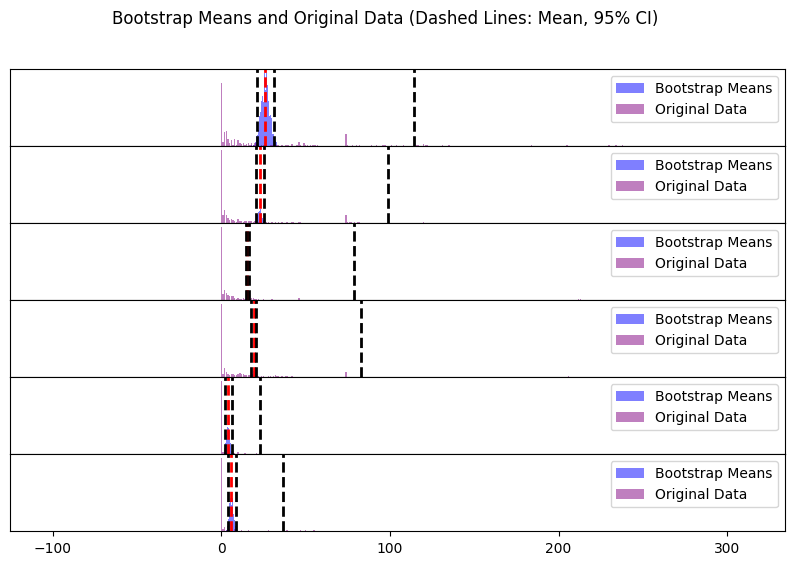

0.6119402985074629


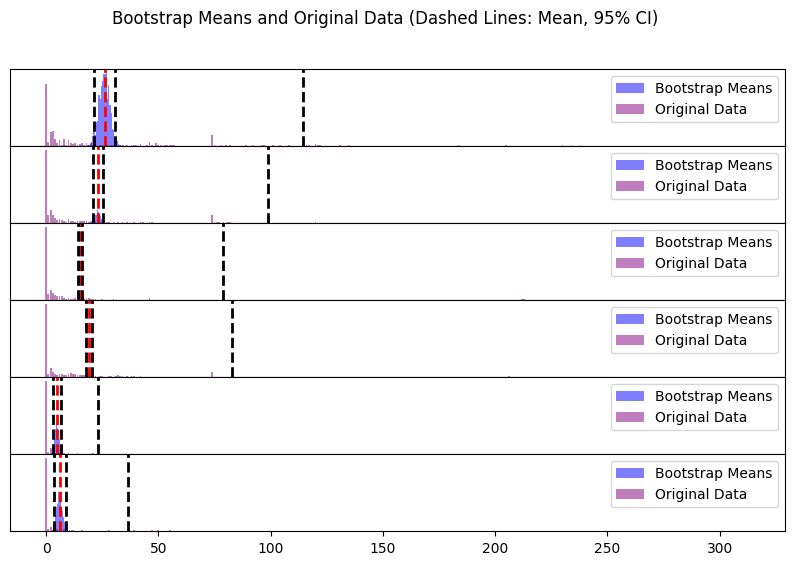

Erfurt Hbf


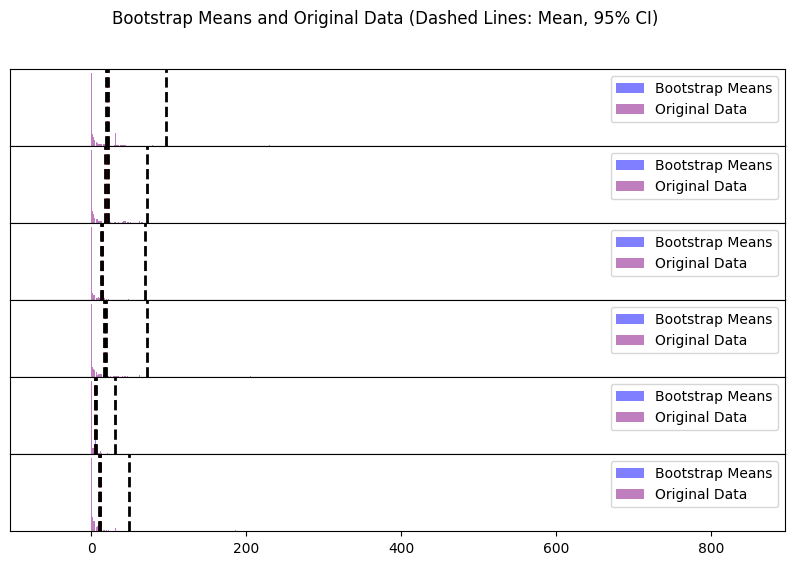

0.02311111111110975
0.014360313315929574
0.12841269841269742
0.007629107981223626
0.18197278911564574
0.05938077634010952


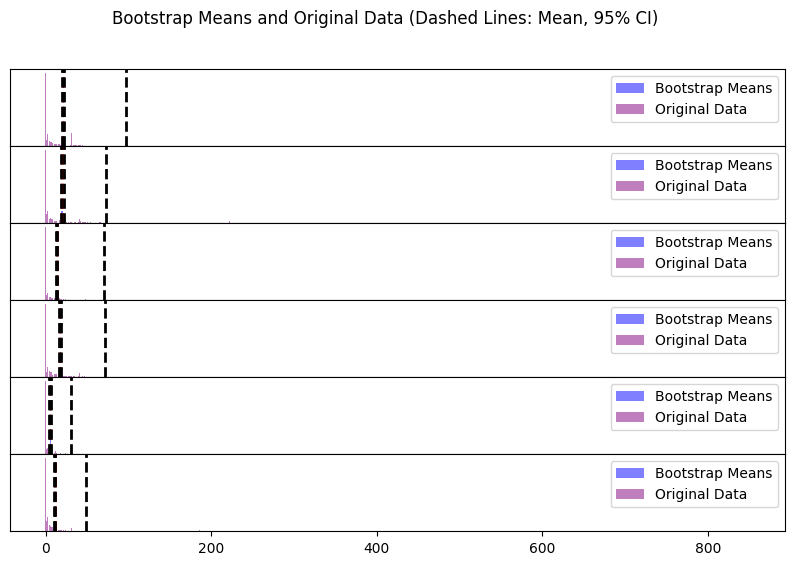

Duisburg Hbf


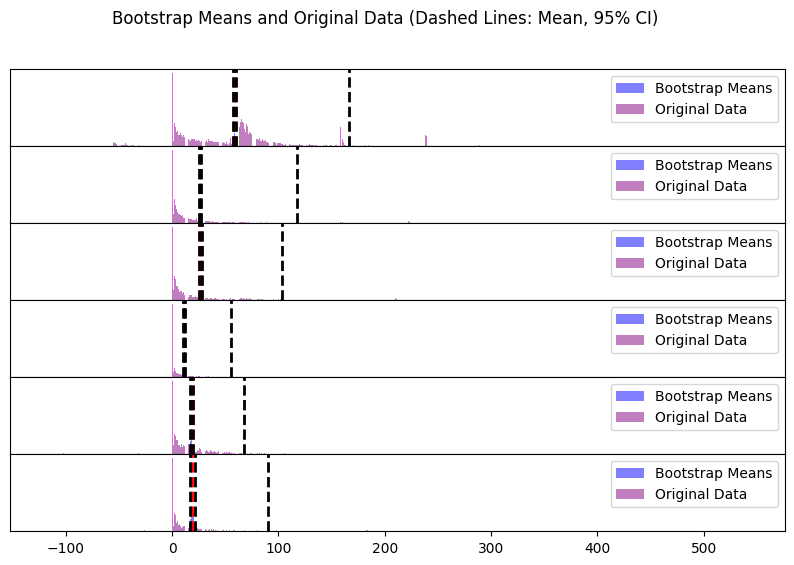

1.9974558753378915
0.04985525892569953
0.10761904761904617
0.618992695117262
1.4596100278551525
1.2598425196850407


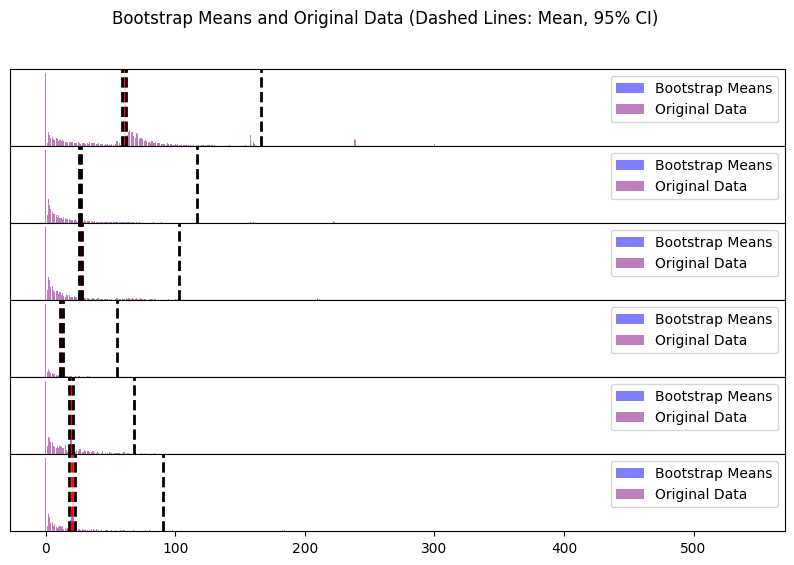

Dortmund Hbf


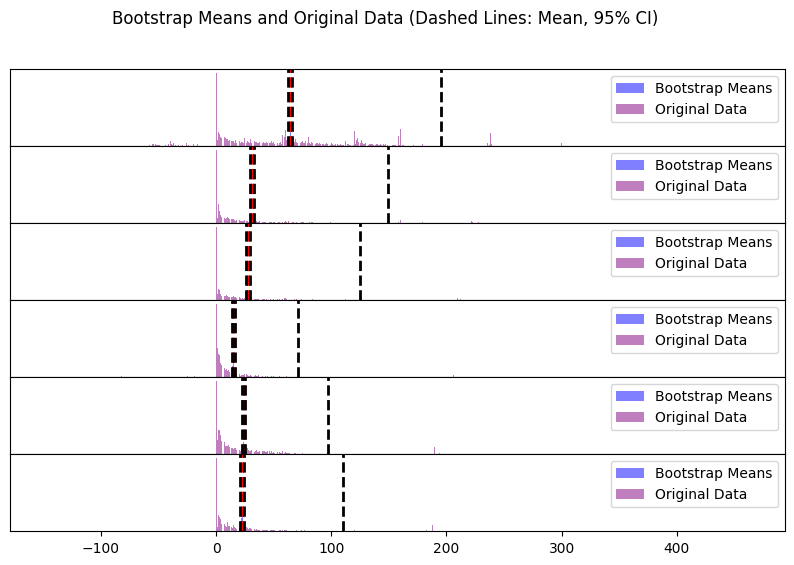

2.5559736594543807
0.11446945337620562
0.10187891440500962
1.3376826722338198
0.71105866486851
1.516382699868938


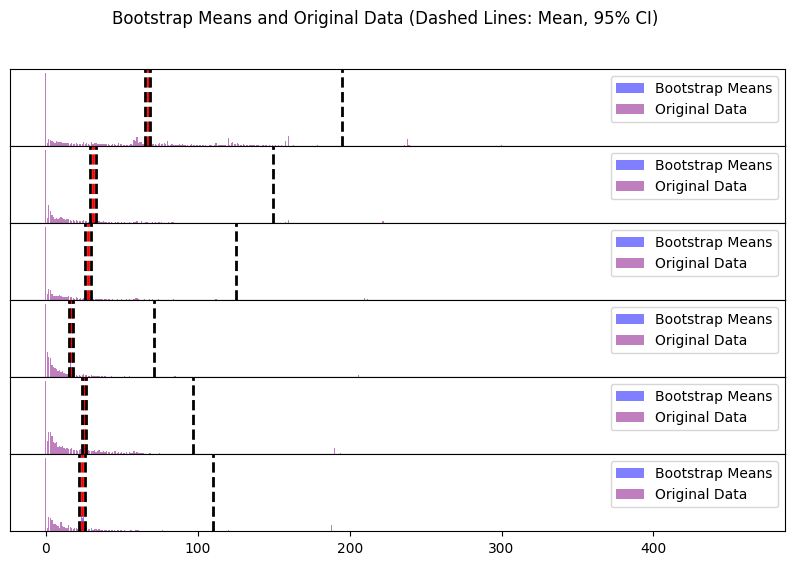

Mainz Hbf


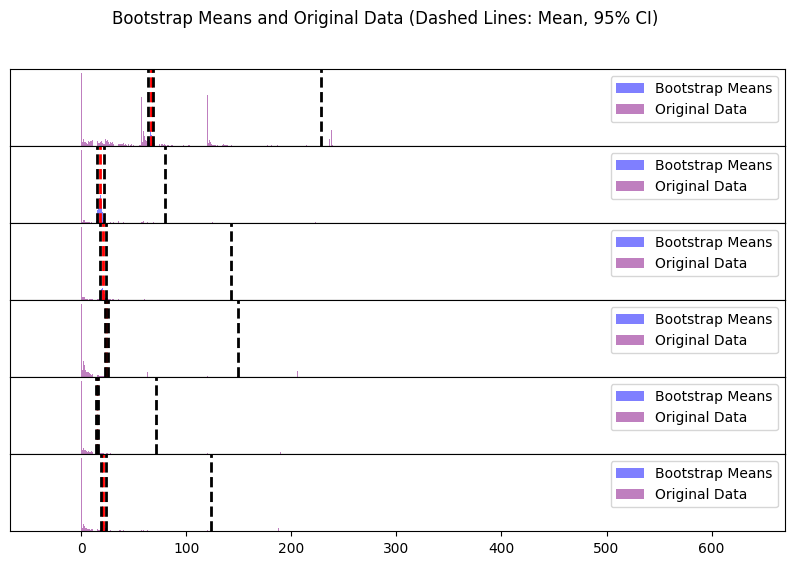

0.3146779303062317
0.030946761080514307
0.0017187052420517546
0.0076495132127973875


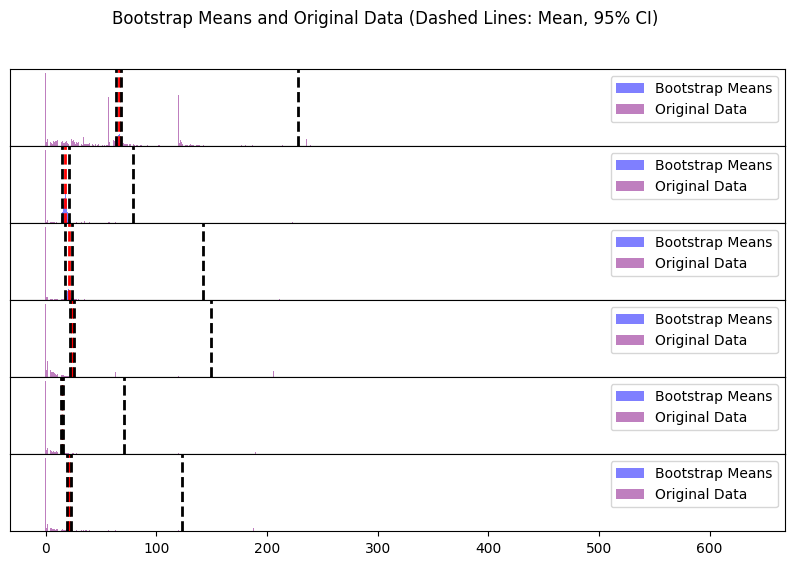

Essen Hbf


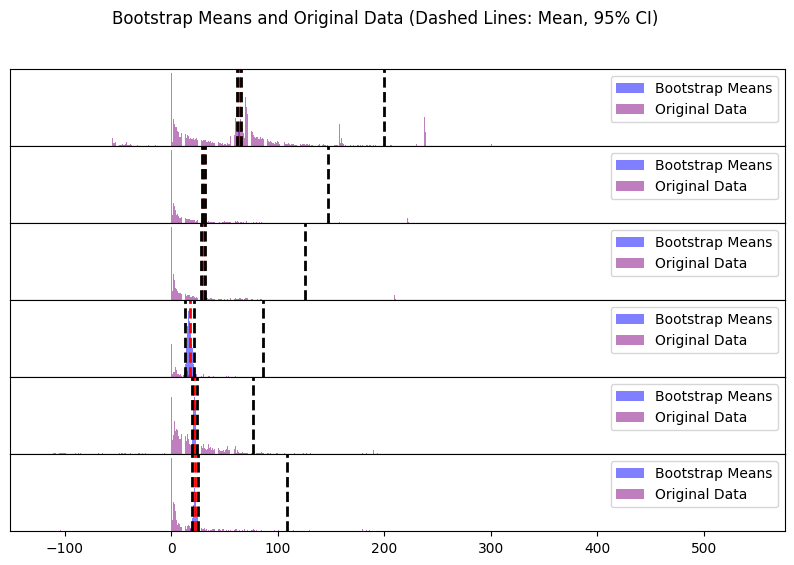

2.0218475830036198
0.025053686471007808
0.018087855297157063
1.5775862068965516
3.027586206896551
0.9408805031446548


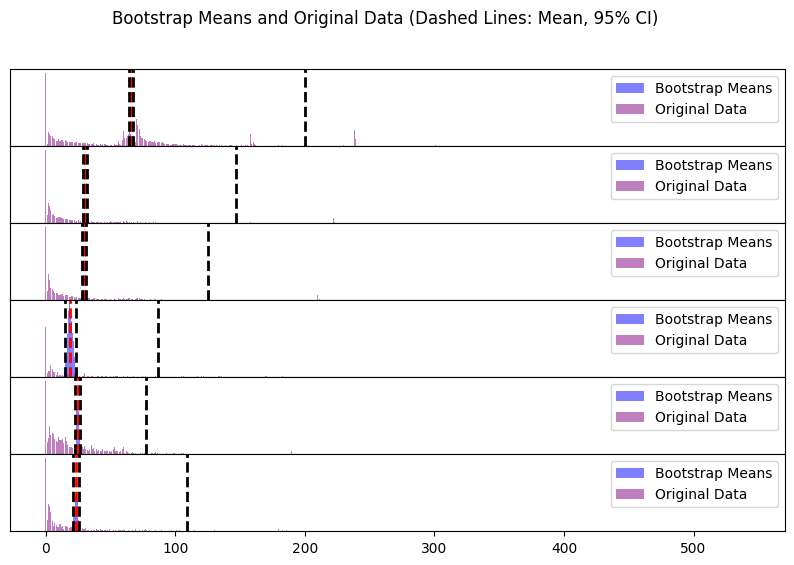

Berlin Hbf


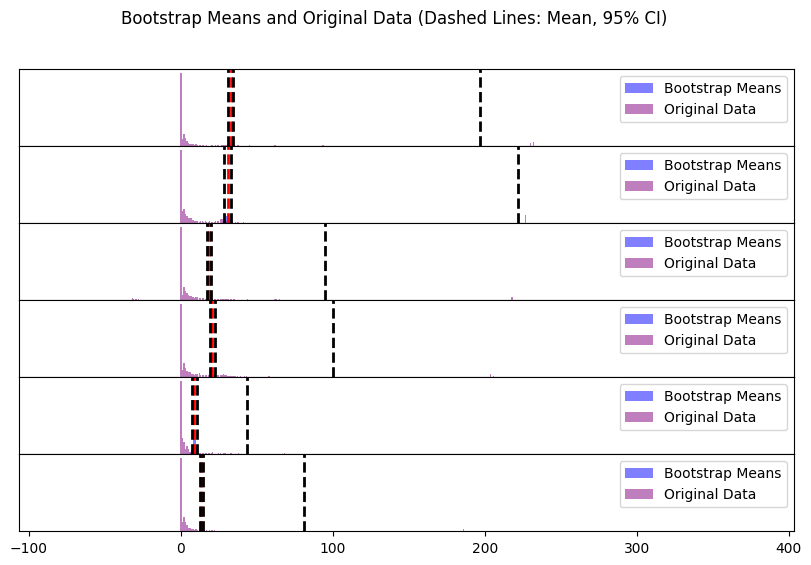

0.0833333333333357
0.47829937998228544
1.5402797877472238
0.034662576687118474
0.24906367041198507
0.04164738546968927


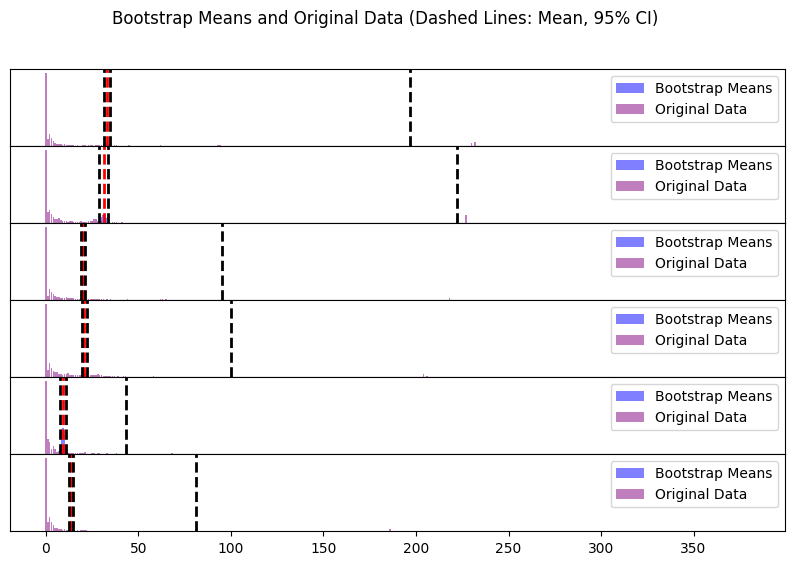

Duesseldorf Hbf


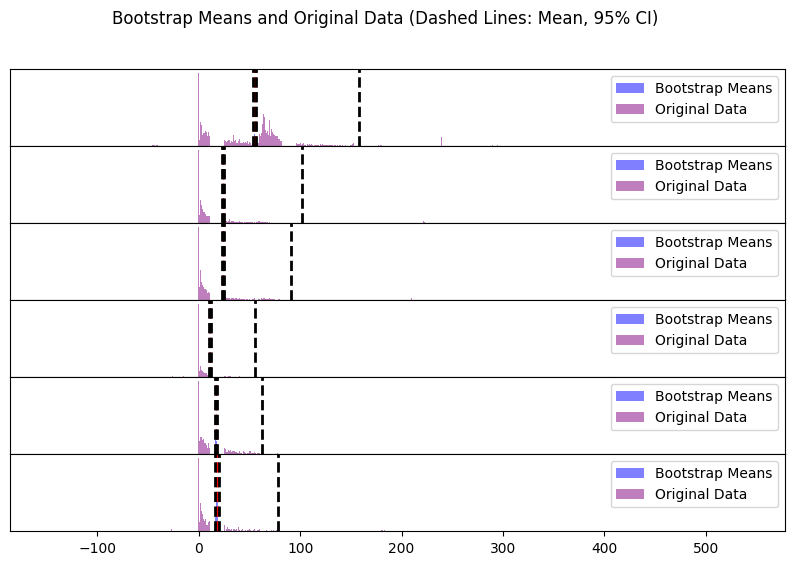

2.07500699692136
0.08229107447413142
0.1288135593220332
0.9097425871619418
1.2821813570069764
1.3563941299790336


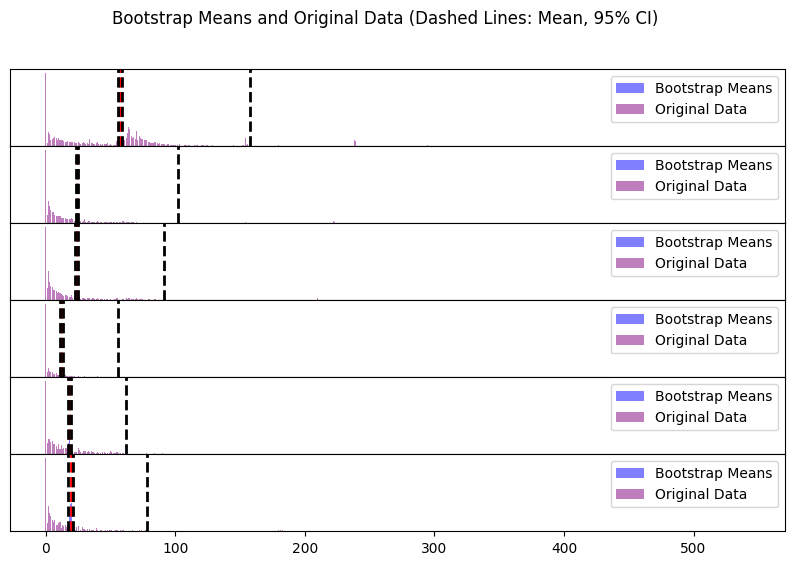

Schwerin Hbf


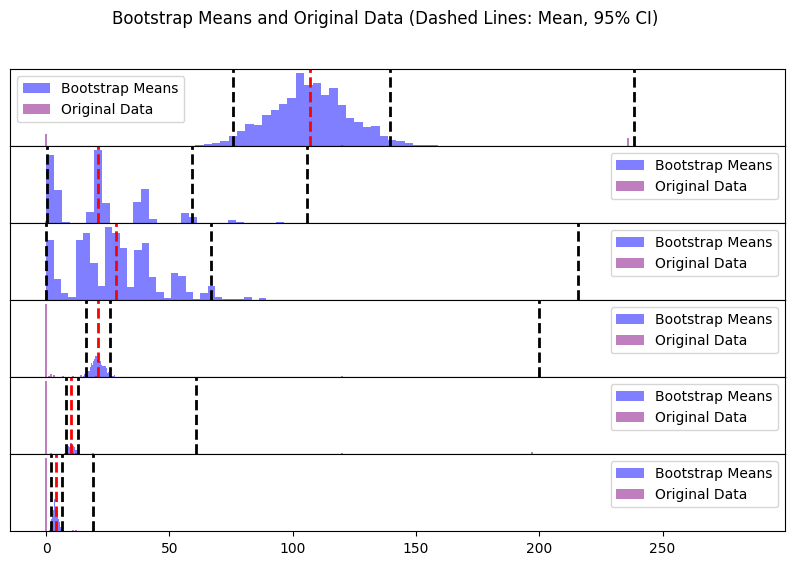

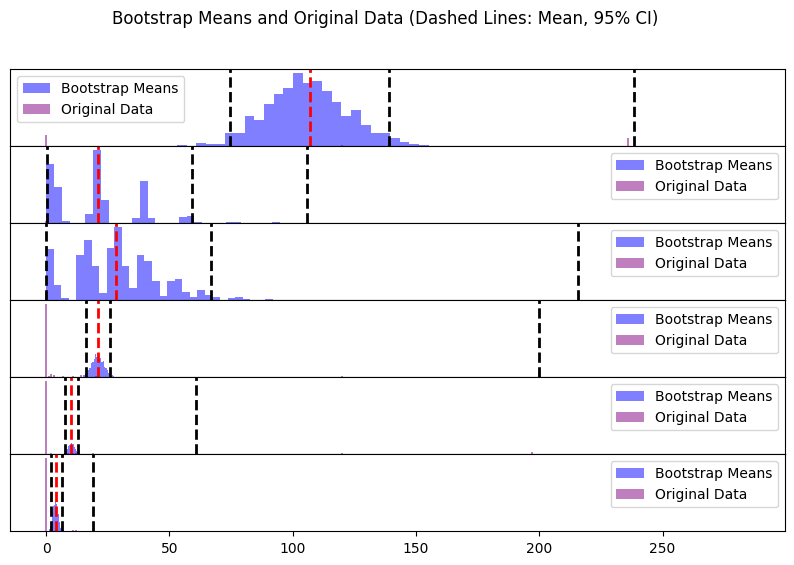

Hannover Hbf


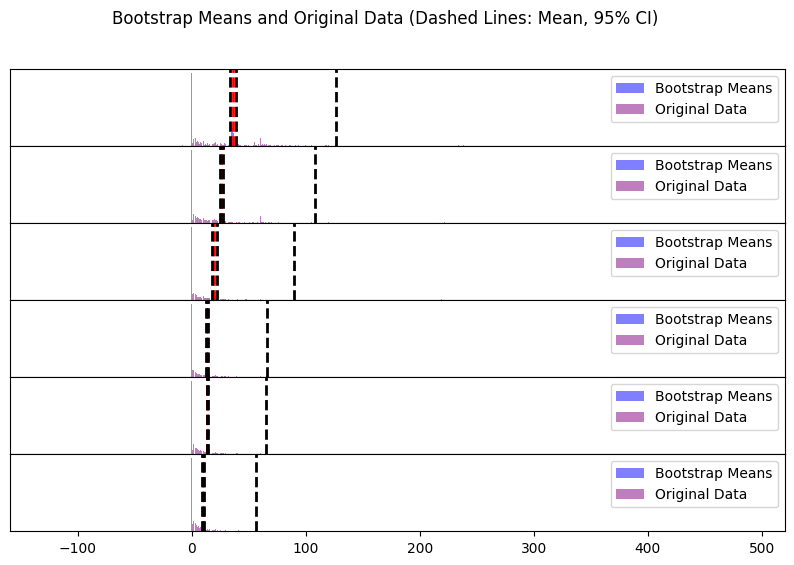

0.0877458396369093
0.012362178416303493
0.03659101435849976
0.712517680339463
0.3591536981989858
1.21639950678175


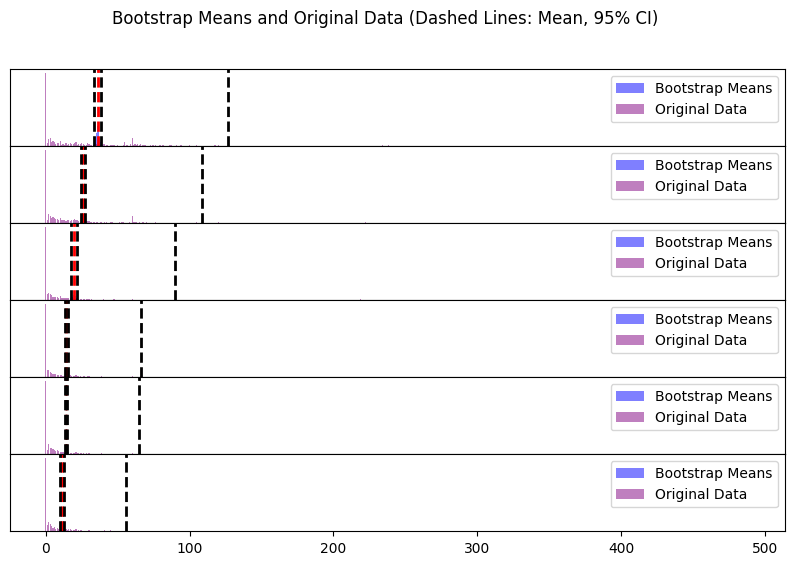

Bremen Hbf


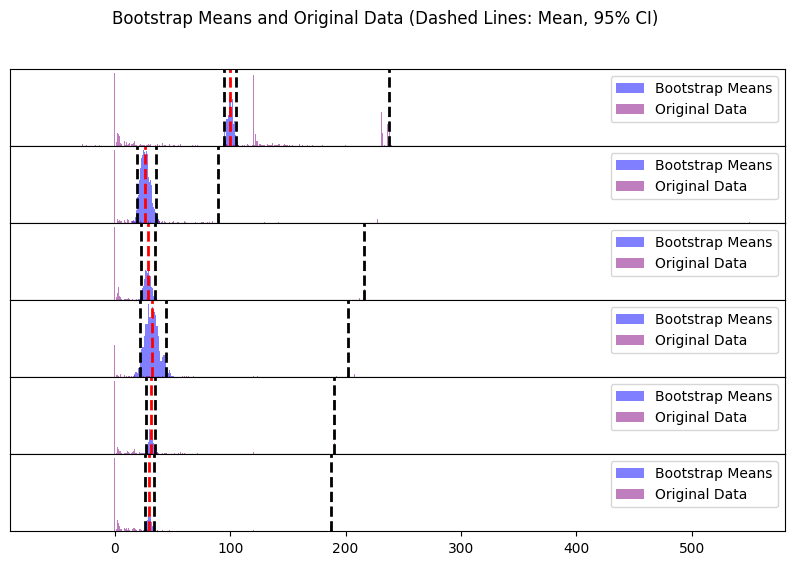

0.4128440366972512
0.179881656804735


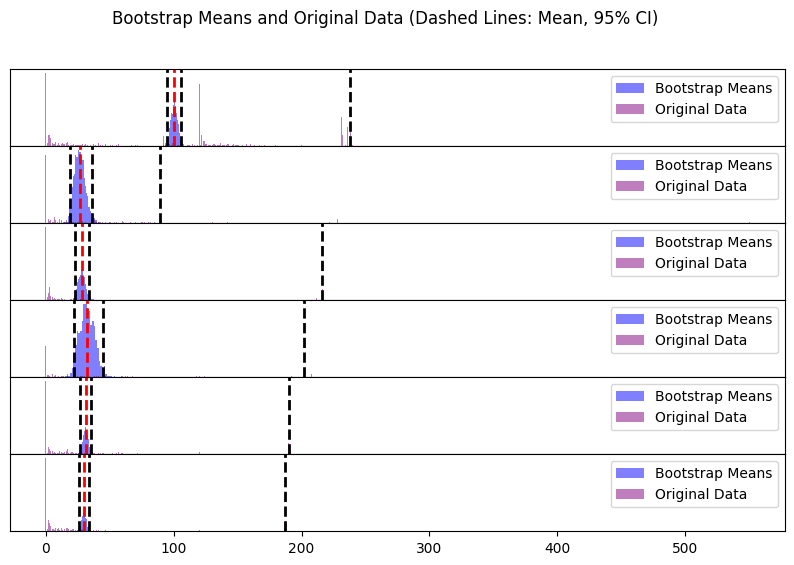

Magdeburg Hbf


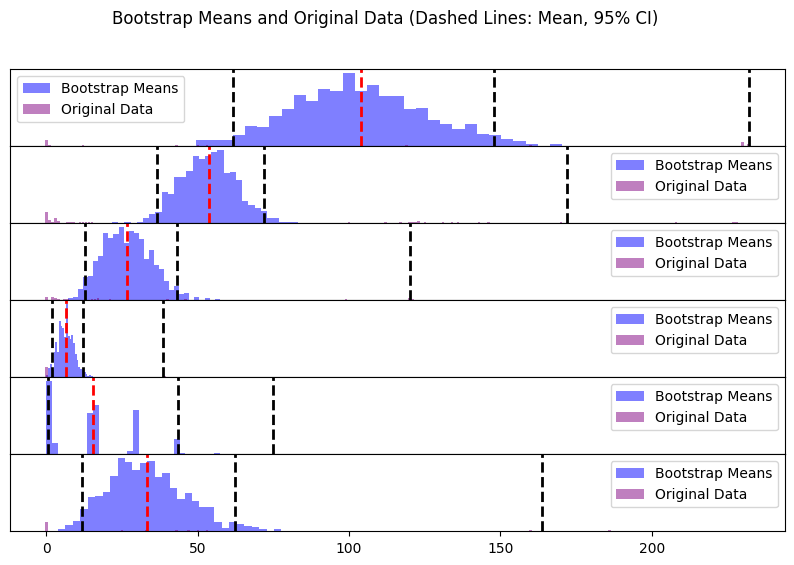

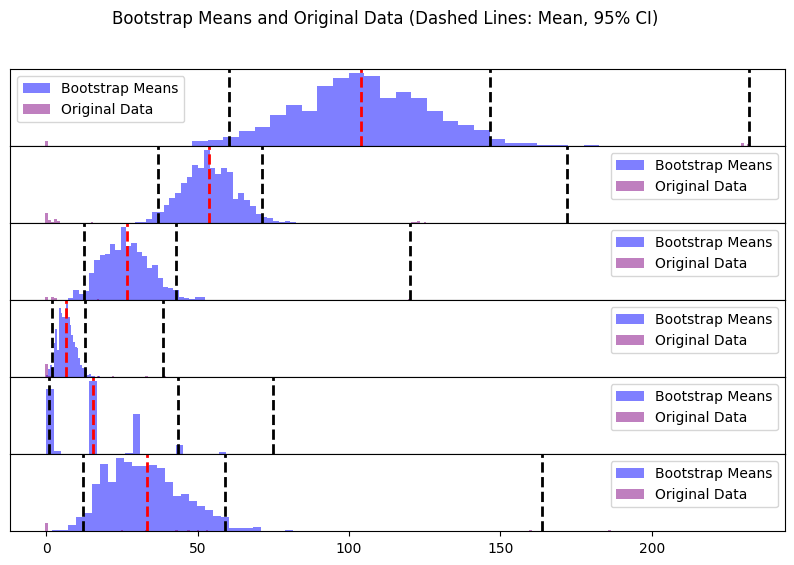

Muenchen Hbf


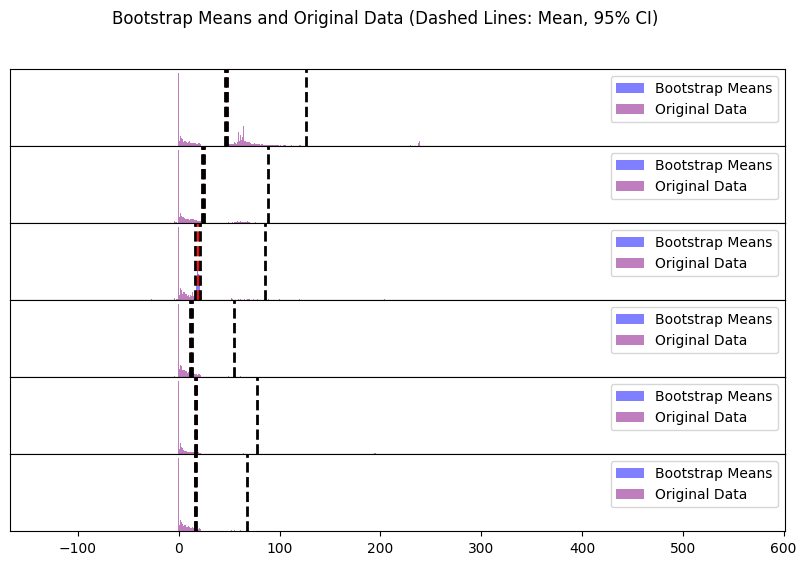

0.32099722991689816
0.1111753149196808
0.13484848484848655
1.1453299675441766
0.20711630377057944
0.7767521902377972


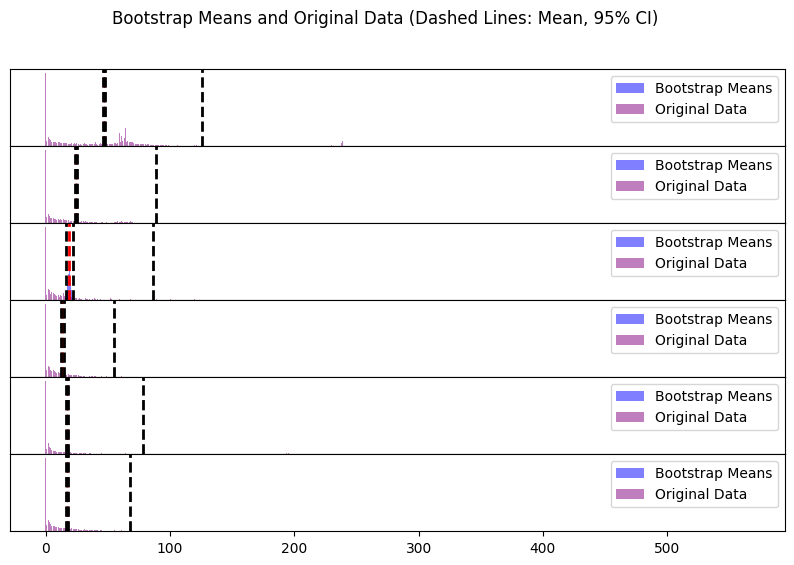

Hamburg Hbf


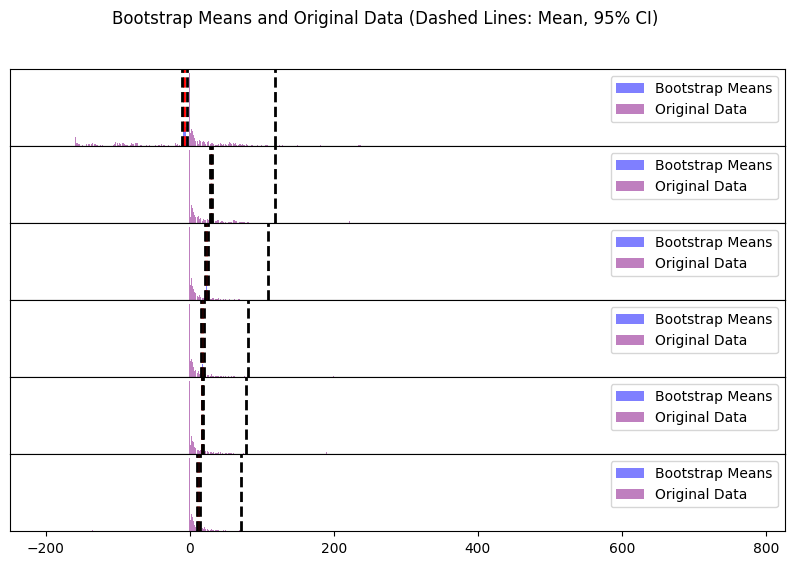

32.16935483870968
0.9307373124800513
0.26597836774827854
1.6342395921835156
1.7858032378580333
4.781712473572938


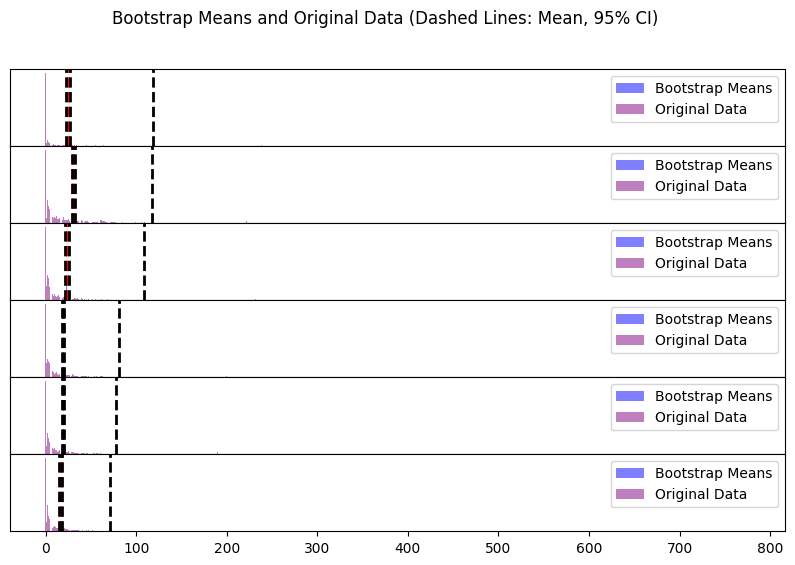

Wiesbaden Hbf


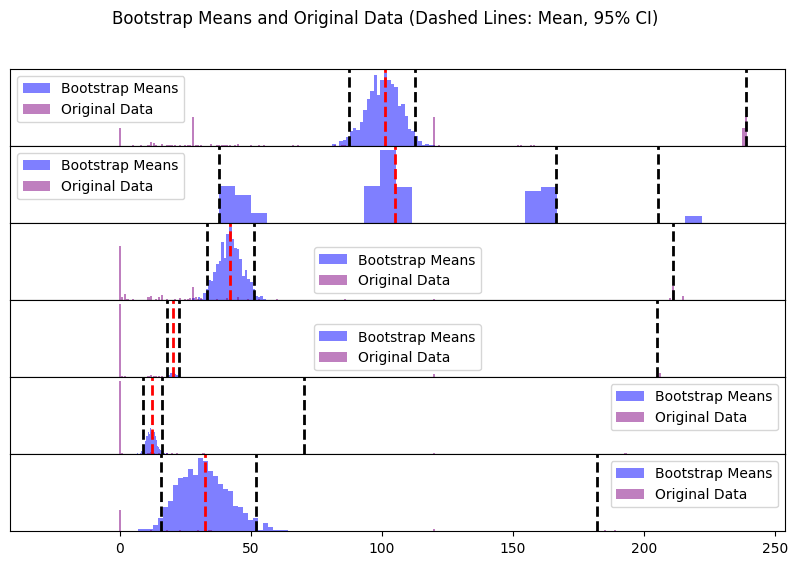

0.01462904911180729


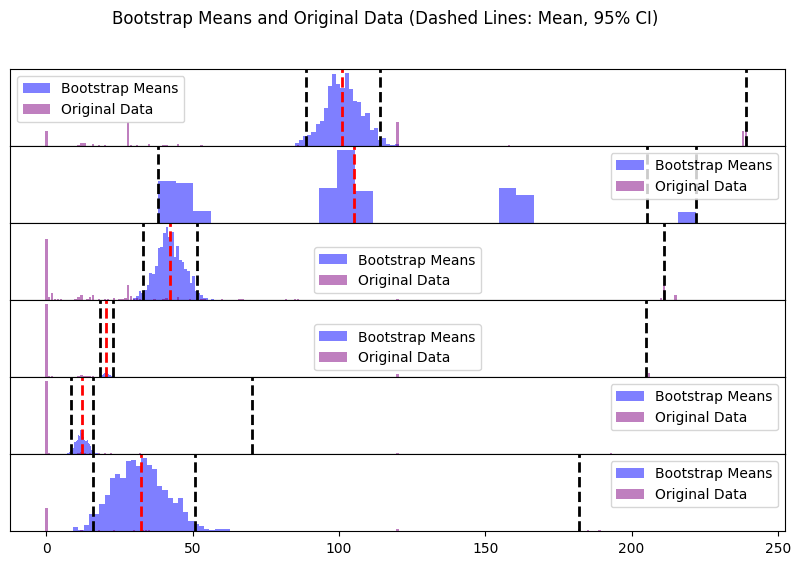

Koeln Hbf


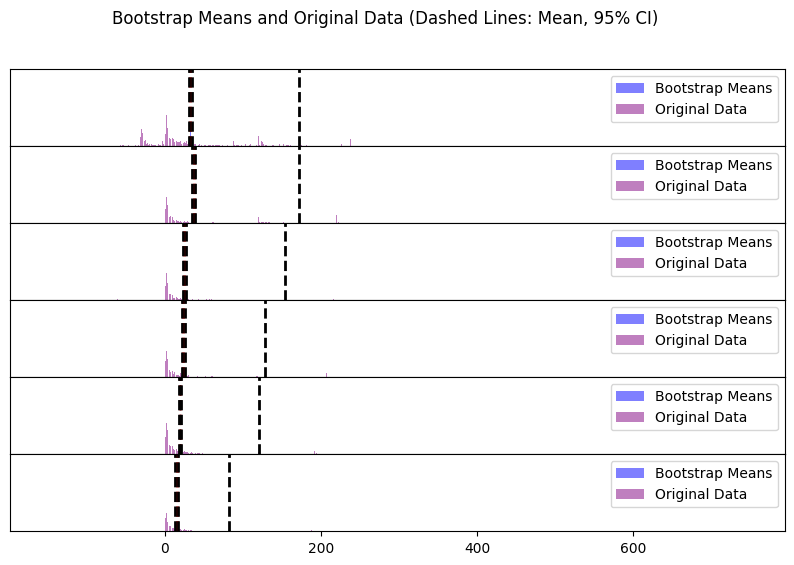

6.754793410748043
0.21754143646408863
0.5047332185886368
0.32128863735306723
0.6131665798158785
1.4074406095921095


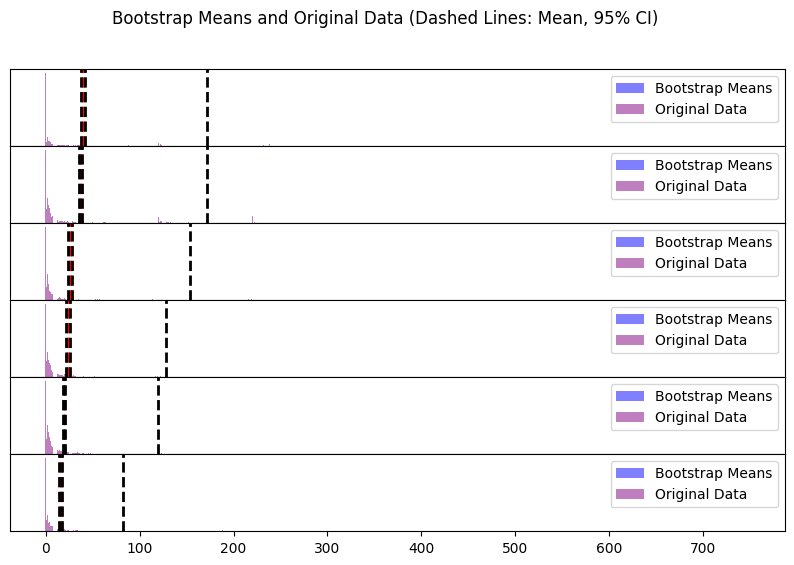

Dresden Hbf


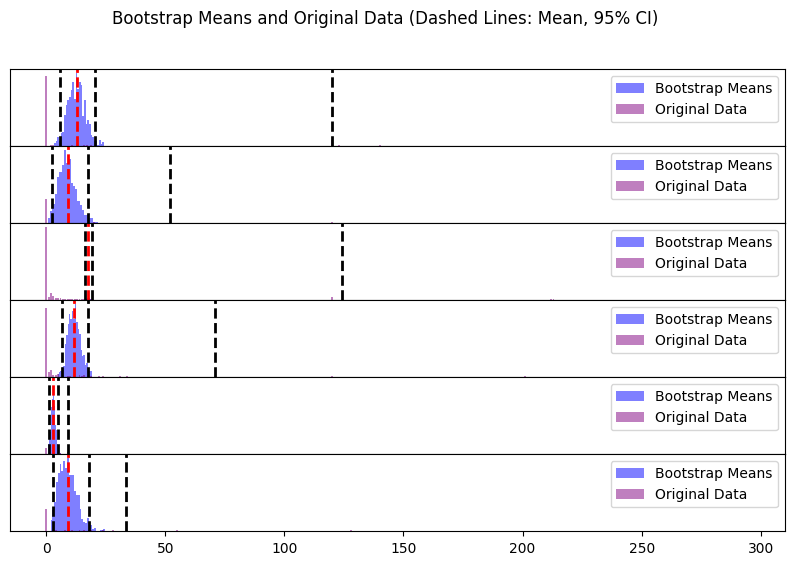

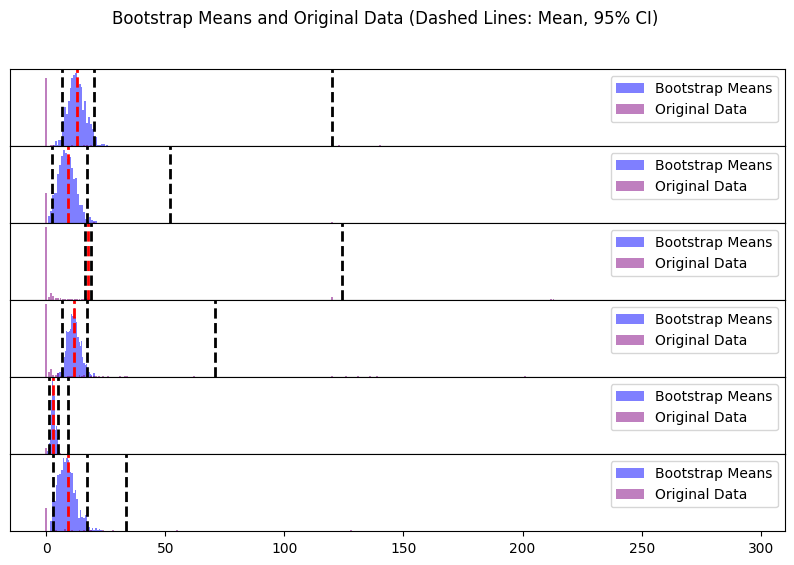

Nuernberg Hbf


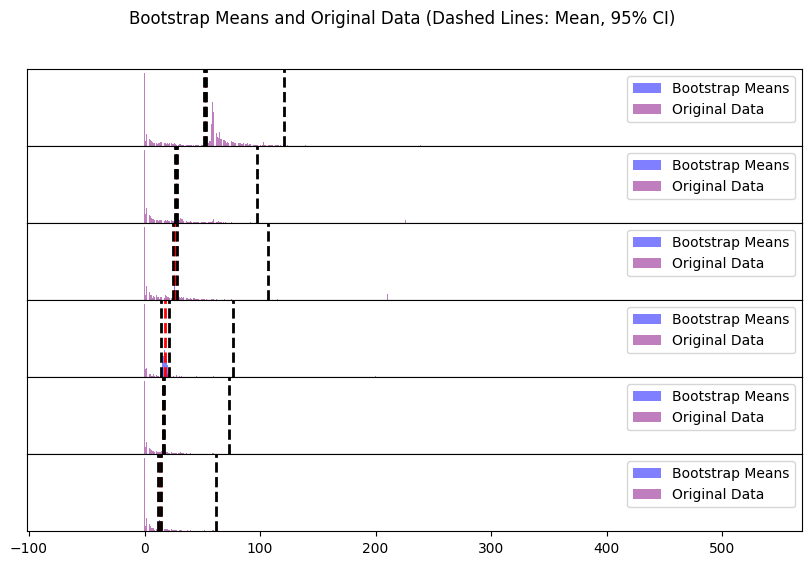

0.0023166917641610496
0.0022857142857155566
0.08997955010224956
0.323974609375
0.4128813559322033


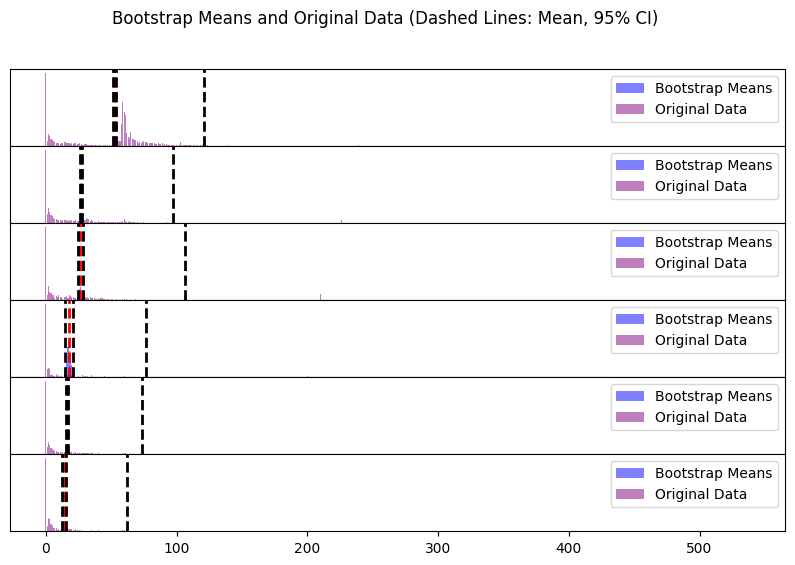

Kiel Hbf


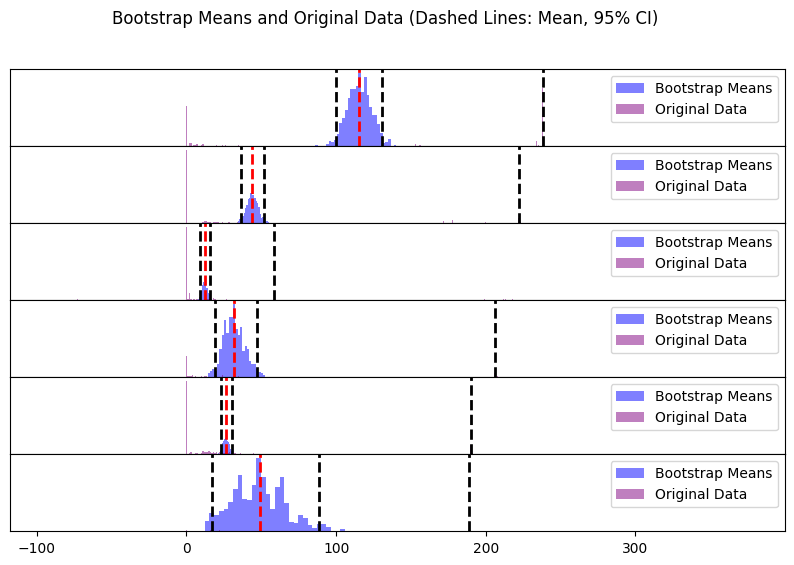

0.27135678391958606
1.1400000000000006
0.227848101265824


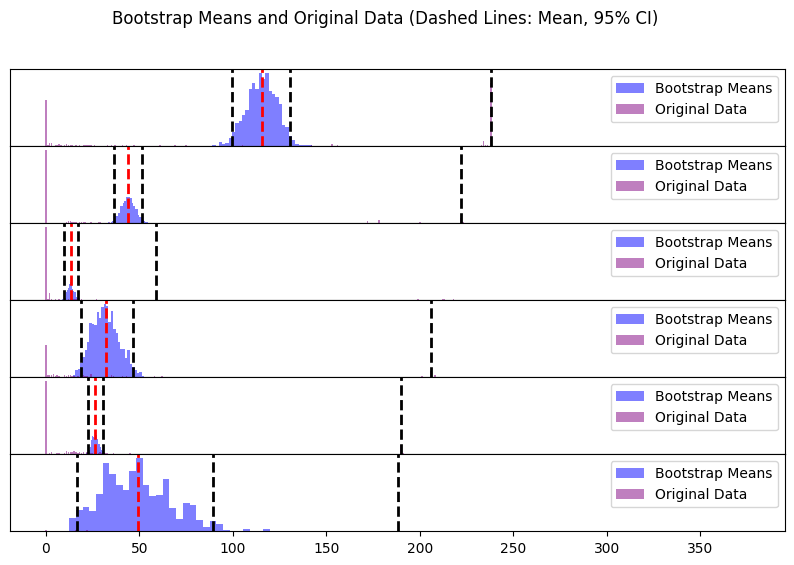

In [ ]:
for dest in df.index.tolist():
    #dest = "Berlin Hbf"
    if dest == "Potsdam Hbf":
        continue
    print(dest)

    df = gain_dict["theoretical_max_gain"]["Stuttgart Hbf"]

    data = np.array([np.array(df.loc[dest]["switch time"]), np.array(df.loc[dest]["delay"])])
    data = data[:, data[0] <= 60]

    data_arrays = [
        data[1, (data[0] >= 1) & (data[0] <= 10)], 
        data[1, (data[0] >= 11) & (data[0] <= 20)], 
        data[1, (data[0] >= 21) & (data[0] <= 30)], 
        data[1, (data[0] >= 31) & (data[0] <= 40)], 
        data[1, (data[0] >= 41) & (data[0] <= 50)], 
        data[1, (data[0] >= 51) & (data[0] <= 60)]
    ]
    if dest == "Koeln Hbf":
        save = data_arrays[0]
    #for d in data_arrays:
    #    print(np.min(d))

    labels = ["1-10", "11-20", "21-30", "31-40", "41-50", "51-60"]

    # Number of bootstrap samples
    n_bootstrap = 1000

    # Create a color map with a gradient from lightgreen to darkgreen
    fig, axs = plt.subplots(len(data_arrays), 1, sharex=True, figsize=(10, 6))

    for i, data in enumerate(data_arrays):
        # Generate bootstrap samples
        bootstrap_samples = np.random.choice(data, (n_bootstrap, len(data)))

        # Calculate means of bootstrap samples
        bootstrap_means = np.mean(bootstrap_samples, axis=1)

        # Calculate 95% confidence interval
        ci_lower = np.percentile(bootstrap_means, 2.5)
        ci_upper = np.percentile(bootstrap_means, 97.5)
        q_lower = np.percentile(data, 2.5)
        q_upper = np.percentile(data, 95)

        # Plot histogram of bootstrap means
        axs[i].hist(bootstrap_means, bins=30, alpha=0.5, color='blue', label='Bootstrap Means')

        # Plot original data as a bar plot
        unique, counts = np.unique(data, return_counts=True)
        axs[i].bar(unique, counts, color='purple', alpha=0.5, label='Original Data')

        # Plot mean and 95% confidence interval
        axs[i].axvline(np.mean(data), color='red', linestyle='dashed', linewidth=2)
        axs[i].axvline(ci_lower, color='black', linestyle='dashed', linewidth=2)
        axs[i].axvline(ci_upper, color='black', linestyle='dashed', linewidth=2)
        #axs[i].axvline(q_lower, color='black', linestyle='dashed', linewidth=2)
        axs[i].axvline(q_upper, color='black', linestyle='dashed', linewidth=2)

        axs[i].legend()

        # Remove y-axis
        axs[i].get_yaxis().set_visible(False)

        # Adjust subplot parameters to reduce whitespace
        plt.subplots_adjust(hspace=0)

    plt.suptitle('Bootstrap Means and Original Data (Dashed Lines: Mean, 95% CI)')
    plt.show()

    fig, axs = plt.subplots(len(data_arrays), 1, sharex=True, figsize=(10, 6))

    for i, data in enumerate(data_arrays):
        m = np.mean(data)
        data[data < 0] = 0
        d = np.mean(data)-m
        if d>0:
            print(d)
        # Generate bootstrap samples
        bootstrap_samples = np.random.choice(data, (n_bootstrap, len(data)))

        # Calculate means of bootstrap samples
        bootstrap_means = np.mean(bootstrap_samples, axis=1)

        # Calculate 95% confidence interval
        ci_lower = np.percentile(bootstrap_means, 2.5)
        ci_upper = np.percentile(bootstrap_means, 97.5)
        q_lower = np.percentile(data, 2.5)
        q_upper = np.percentile(data, 95)

        # Plot histogram of bootstrap means
        axs[i].hist(bootstrap_means, bins=30, alpha=0.5, color='blue', label='Bootstrap Means')

        # Plot original data as a bar plot
        unique, counts = np.unique(data, return_counts=True)
        axs[i].bar(unique, counts, color='purple', alpha=0.5, label='Original Data')

        # Plot mean and 95% confidence interval
        axs[i].axvline(np.mean(data), color='red', linestyle='dashed', linewidth=2)
        axs[i].axvline(ci_lower, color='black', linestyle='dashed', linewidth=2)
        axs[i].axvline(ci_upper, color='black', linestyle='dashed', linewidth=2)
        #axs[i].axvline(q_lower, color='black', linestyle='dashed', linewidth=2)
        axs[i].axvline(q_upper, color='black', linestyle='dashed', linewidth=2)

        axs[i].legend()

        # Remove y-axis
        axs[i].get_yaxis().set_visible(False)

        # Adjust subplot parameters to reduce whitespace
        plt.subplots_adjust(hspace=0)

    plt.suptitle('Bootstrap Means and Original Data (Dashed Lines: Mean, 95% CI)')
    plt.show()


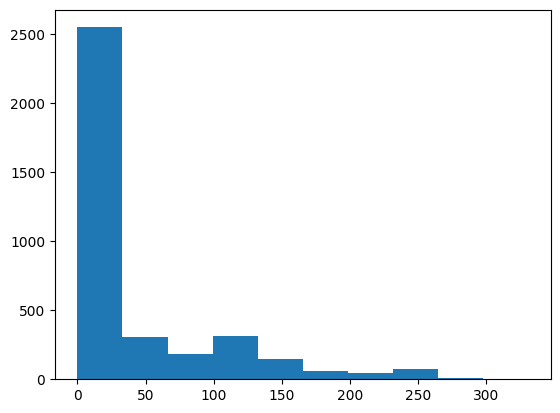

0.0


In [ ]:
plt.hist(save)
plt.show()
print(np.min(save))